# Contextualização

Atividade que fez parte do bootcamp "Python: Fundamentos e Análise de Dados" da [{reprograma}](https://reprograma.com.br/curso-python/), realizado no segundo semestre de 2023. A presente atividade foi realizada na Semana 14 do curso.

[Repositório no GitHub](https://github.com/zenite-serena/Atividade-Didatica-Analise-de-Dados)

Objetivo: Sedimentar os conhecimentos de Análise de Dados estudados em aula. 

Desafio: Criar um notebook de análise exploratória com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

Requisitos:

- Formular um mínimo de 3 perguntas para guiar a análise;
- Utilizar pelo menos 3 bases de dados da Olist;
- Criar pelo menos 3 gráficos;
- Exportar a base final.


# Coleta de dados

Para a presente análise serão utilizadas as seguintes informações e suas respectivas tabelas:

- pedidos (olist_orders_dataset)
- review dos usuários sobre os pedidos (olist_order_reviews_dataset)
- detalhes dos produtos (olist_products_dataset)
- itens dos pedidos (olist_order_items_dataset)
- detalhes do consumidor que fez os pedidos (olist_customers_dataset)

Essas informações foram escolhidas como decorrência das seguintes perguntas, que serão retomadas posteriormente:

- quais as categorias dos produtos mais vendidos?
- qual a relação entre nota dada (review score) e status de entrega (atrasado, adiantado, entregue)?
- qual a relação entre estado e valor de frete?
- qual a relação entre estado e status de entrega (atrasado, adiantado, entregue)?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_pedidos = pd.read_csv('dados_olist/olist_orders_dataset.csv')
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [3]:
df_reviews = pd.read_csv('dados_olist/olist_order_reviews_dataset.csv')
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [4]:
df_produtos = pd.read_csv('dados_olist/olist_products_dataset.csv')
df_produtos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [5]:
df_itens_pedido = pd.read_csv('dados_olist/olist_order_items_dataset.csv')
df_itens_pedido

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
df_consumidor = pd.read_csv('dados_olist/olist_customers_dataset.csv')
df_consumidor

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


# Limpeza dos dados

Para a limpeza dos dados, foram reaproveitadas algumas escolhas feitas durante a aula, por coincidirem com nossos objetivos

In [7]:
# Vamos começar nossa limpeza filtrando somente as colunas que desejamos utilizar
columns_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
df_pedidos = df_pedidos.drop(columns_drop, axis=1)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [8]:
# removendo colunas desnecessárias

columns_drop_review = ['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
df_reviews = df_reviews.drop(columns_drop_review, axis=1)
df_reviews

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4


In [9]:
# removendo colunas desnecessárias

columns_drop_produtos = ['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']
df_produtos = df_produtos.drop(columns_drop_produtos, axis=1)
df_produtos

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


In [10]:
# removendo colunas desnecessárias

columns_drop_produtos_itenspedidos = ['seller_id']
df_itens_pedido = df_itens_pedido.drop(columns_drop_produtos_itenspedidos, axis=1)

df_itens_pedido

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2017-08-21 00:04:32,55.99,8.72


In [11]:
# removendo colunas desnecessárias

columns_drop_consumidor = ['customer_unique_id', 'customer_zip_code_prefix']
df_consumidor = df_consumidor.drop(columns_drop_consumidor, axis=1)

df_consumidor

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,canoas,RS


In [12]:
# Agora iremos filtrar somente aqueles pedidos que foram finalizados, mas antes é importante entender todos os status disponíveis que temos na base
df_pedidos['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [13]:
# filtrando apenas os pedidos que foram entregues
df_pedidos = df_pedidos.loc[df_pedidos['order_status'] == 'delivered']
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [14]:
# Filtrando somente pedidos finalizados, percebemos que perdemos um número razoável de linhas, cerca de 3 mil.
# Agora, com nosso dataset filtrado, precisamos resetar o seu index:
df_pedidos = df_pedidos.reset_index(drop=True)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [15]:
# Por padrão é realizado o merge dos dados com o inner join
# Jutando os df pedidos e itens de pedidos
df_olist = pd.merge(df_pedidos, df_itens_pedido, on='order_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,2018-02-12 13:10:37,174.90,20.10
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,1,b80910977a37536adeddd63663f916ad,2017-09-05 15:04:16,205.99,65.02
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,1,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-12 21:36:21,179.99,40.59
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-12 21:36:21,179.99,40.59


In [16]:
# Jutando agora com os dados de consumidor
df_olist = pd.merge(df_olist, df_consumidor, on='customer_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,2018-02-12 13:10:37,174.90,20.10,praia grande,SP
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,1,b80910977a37536adeddd63663f916ad,2017-09-05 15:04:16,205.99,65.02,nova vicosa,BA
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,1,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-12 21:36:21,179.99,40.59,japuiba,RJ
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-12 21:36:21,179.99,40.59,japuiba,RJ


In [17]:
# juntando com reviews

df_olist = pd.merge(df_olist, df_reviews, on='order_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_city,customer_state,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,barreiras,BA,8d5266042046a06655c8db133d120ba5,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110008,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,2018-02-12 13:10:37,174.90,20.10,praia grande,SP,29bb71b2760d0f876dfa178a76bc4734,4
110009,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,1,b80910977a37536adeddd63663f916ad,2017-09-05 15:04:16,205.99,65.02,nova vicosa,BA,371579771219f6db2d830d50805977bb,5
110010,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,1,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-12 21:36:21,179.99,40.59,japuiba,RJ,8ab6855b9fe9b812cd03a480a25058a1,2
110011,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-12 21:36:21,179.99,40.59,japuiba,RJ,8ab6855b9fe9b812cd03a480a25058a1,2


In [18]:
# juntando com produtos

df_olist = pd.merge(df_olist, df_produtos, on='product_id', how='inner')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_city,customer_state,review_id,review_score,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,1,87285b34884572647811a353c7ac498a,2017-08-21 20:05:16,29.99,7.78,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,1,87285b34884572647811a353c7ac498a,2017-08-08 18:37:31,29.99,7.78,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,1,87285b34884572647811a353c7ac498a,2017-10-31 02:14:11,29.99,14.10,florianopolis,SC,1bafb430e498b939f258b9c9dbdff9b1,3,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,perfumaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110008,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,1,0df37da38a30a713453b03053d60d3f7,2017-08-17 21:35:26,356.00,18.12,sao paulo,SP,f5453b3d33358ed459eb4312392b96a8,4,esporte_lazer
110009,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,2,0df37da38a30a713453b03053d60d3f7,2017-08-17 21:35:26,356.00,18.12,sao paulo,SP,f5453b3d33358ed459eb4312392b96a8,4,esporte_lazer
110010,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2018-01-26 15:45:14,1,3d2c44374ee42b3003a470f3e937a2ea,2017-12-27 10:09:52,55.90,15.14,campo do tenente,PR,8ea780895f362ce949029f95b7181ff0,1,instrumentos_musicais
110011,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,1,ac35486adb7b02598c182c2ff2e05254,2017-03-15 09:54:05,72.00,13.08,sao jose dos campos,SP,e262b3f92d1ce917aa412a9406cf61a6,5,beleza_saude


In [19]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110013 entries, 0 to 110012
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110013 non-null  object 
 1   customer_id                    110013 non-null  object 
 2   order_status                   110013 non-null  object 
 3   order_purchase_timestamp       110013 non-null  object 
 4   order_delivered_customer_date  110005 non-null  object 
 5   order_item_id                  110013 non-null  int64  
 6   product_id                     110013 non-null  object 
 7   shipping_limit_date            110013 non-null  object 
 8   price                          110013 non-null  float64
 9   freight_value                  110013 non-null  float64
 10  customer_city                  110013 non-null  object 
 11  customer_state                 110013 non-null  object 
 12  review_id                     

# Analisando os dados

Buscaremos responder às seguintes perguntas:
- Quais as categorias dos produtos mais vendidos?
- Qual a relação entre estado e status de entrega (atrasado, adiantado, entregue)?
- Qual a relação entre estado e valor de frete?
- Qual a relação entre nota dada (review score) e status de entrega (atrasado, adiantado, entregue)?

Começaremos respondendo à primeira pergunta: "Quais as categorias dos produtos mais vendidos?"

In [20]:
# fazemos uma simples contagem para encontrar estes valores e selecionar os top 10

categorias_mais_vendidas = df_olist.value_counts('product_category_name').head(10)

categorias_mais_vendidas

product_category_name
cama_mesa_banho           10985
beleza_saude               9456
esporte_lazer              8436
moveis_decoracao           8159
informatica_acessorios     7672
utilidades_domesticas      6780
relogios_presentes         5825
telefonia                  4408
ferramentas_jardim         4254
automotivo                 4117
Name: count, dtype: int64

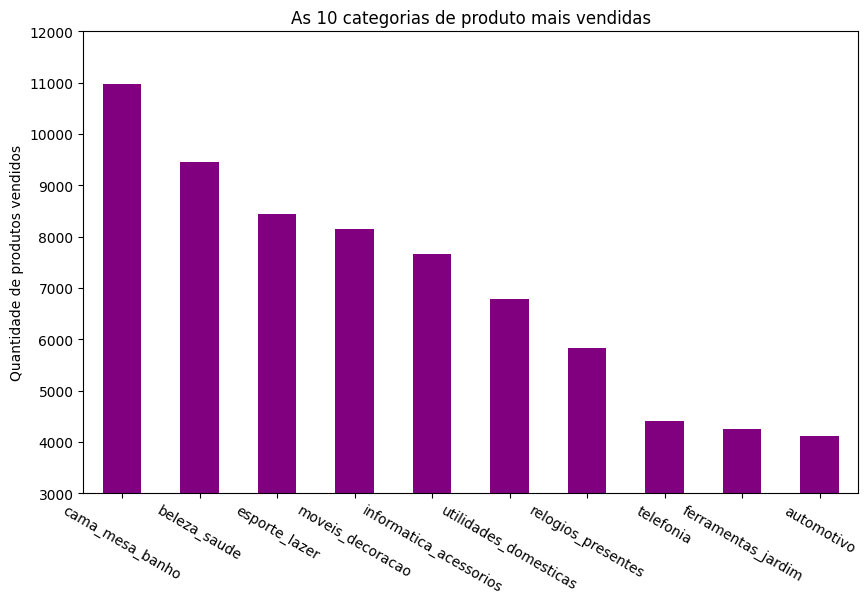

In [21]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um plot simples

categorias_mais_vendidas.plot(kind='bar', color='purple')

# definir texto do título e eixos x e y

plt.title('As 10 categorias de produto mais vendidas')
plt.ylabel('Quantidade de produtos vendidos')
plt.xlabel('')

# estabelecemos um range para o y que faça sentido para nossos dados

plt.ylim(3000,12000)

# rotacionar legenda do eixo x

plt.xticks(rotation=330)

# plotar


plt.savefig('top10_categorias.png')

In [22]:
# Para essa análise, iremos criar uma classificação para o status do frete, sendo: ATRASADO, ADIANTADO e DENTRO DO ESPERADO, e então iremos observar a proporção
# dos pedidos para cada status.

df_olist['order_purchase_timestamp'] = pd.to_datetime(df_olist['order_purchase_timestamp'])
df_olist['order_delivered_customer_date'] = pd.to_datetime(df_olist['order_delivered_customer_date'])

df_olist['order_delivered_date'] = df_olist['order_delivered_customer_date'].dt.date
df_olist['shipping_limit_dt'] = pd.to_datetime(df_olist['shipping_limit_date']).dt.date

# condicional 
df_olist.loc[df_olist['order_delivered_date'] > df_olist['shipping_limit_dt'], 'status_entrega'] = 'ATRASADO'
df_olist.loc[df_olist['order_delivered_date'] < df_olist['shipping_limit_dt'], 'status_entrega'] = 'ADIANTADO'
df_olist.loc[df_olist['order_delivered_date'] == df_olist['shipping_limit_dt'], 'status_entrega'] = 'DENTRO DO ESPERADO'
df_olist

C:\Users\zenit\AppData\Local\Temp\ipykernel_4460\2145224177.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ATRASADO' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_olist.loc[df_olist['order_delivered_date'] > df_olist['shipping_limit_dt'], 'status_entrega'] = 'ATRASADO'


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_city,customer_state,review_id,review_score,product_category_name,order_delivered_date,shipping_limit_dt,status_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,utilidades_domesticas,2017-10-10,2017-10-06,ATRASADO
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,1,87285b34884572647811a353c7ac498a,2017-08-21 20:05:16,29.99,7.78,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,utilidades_domesticas,2017-08-18,2017-08-21,ADIANTADO
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,1,87285b34884572647811a353c7ac498a,2017-08-08 18:37:31,29.99,7.78,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,utilidades_domesticas,2017-08-07,2017-08-08,ADIANTADO
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,1,87285b34884572647811a353c7ac498a,2017-10-31 02:14:11,29.99,14.10,florianopolis,SC,1bafb430e498b939f258b9c9dbdff9b1,3,utilidades_domesticas,2017-11-07,2017-10-31,ATRASADO
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,perfumaria,2018-08-07,2018-07-30,ATRASADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110008,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,1,0df37da38a30a713453b03053d60d3f7,2017-08-17 21:35:26,356.00,18.12,sao paulo,SP,f5453b3d33358ed459eb4312392b96a8,4,esporte_lazer,2017-08-23,2017-08-17,ATRASADO
110009,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,2,0df37da38a30a713453b03053d60d3f7,2017-08-17 21:35:26,356.00,18.12,sao paulo,SP,f5453b3d33358ed459eb4312392b96a8,4,esporte_lazer,2017-08-23,2017-08-17,ATRASADO
110010,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2018-01-26 15:45:14,1,3d2c44374ee42b3003a470f3e937a2ea,2017-12-27 10:09:52,55.90,15.14,campo do tenente,PR,8ea780895f362ce949029f95b7181ff0,1,instrumentos_musicais,2018-01-26,2017-12-27,ATRASADO
110011,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,1,ac35486adb7b02598c182c2ff2e05254,2017-03-15 09:54:05,72.00,13.08,sao jose dos campos,SP,e262b3f92d1ce917aa412a9406cf61a6,5,beleza_saude,2017-03-17,2017-03-15,ATRASADO


Para responder a segunda pergunta ("Qual a relação entre nota dada (review score) e status de entrega?") plotei um gráfico relacionando status de entrega e review score. Ao final do código incluí os valores em porcentagem, mas não consegui plotá-los em um gráfico

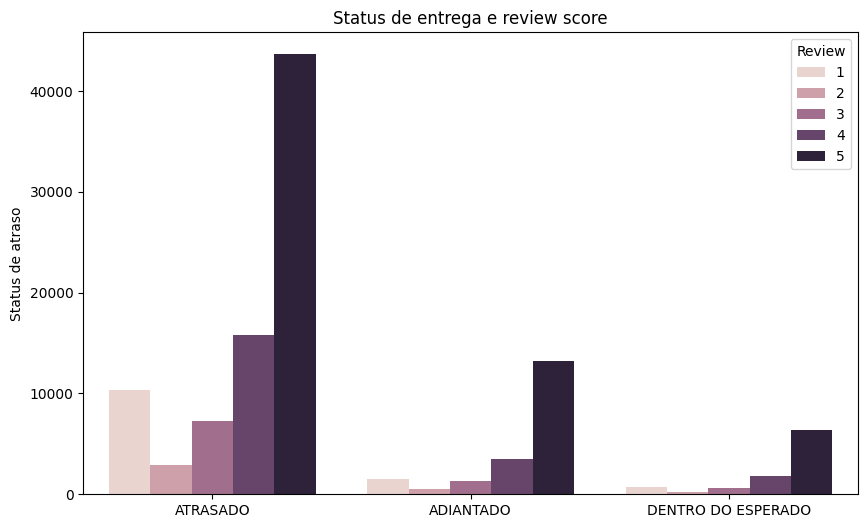

In [23]:
# gráfico para visualizar a relação entre status de entrega e review score

# definir tamanho da figura
plt.figure(figsize=(10, 6))

sns.countplot(data = df_olist,
              x = 'status_entrega',
              hue = 'review_score')

# definir texto do título e eixos x e y

plt.title('Status de entrega e review score')
plt.xlabel('')
plt.ylabel('Status de atraso')

plt.legend(title = 'Review')


plt.savefig('status_entrega_review_score.png')

Para responder à terceira pergunta ("Qual a relação entre estado e valor de frete?"), comecei a calcular o frete médio separado por estado e organizar essas informações

In [24]:
frete_medio_por_estado = df_olist.groupby('customer_state')['freight_value'].mean()
frete_medio_por_estado

customer_state
AC    40.047912
AL    35.746168
AM    33.321166
AP    34.281500
BA    26.492314
CE    32.751362
DF    21.073058
ES    21.946503
GO    22.668417
MA    38.448273
MG    20.597114
MS    23.275201
MT    28.007405
PA    35.533823
PB    43.176609
PE    32.722351
PI    39.113584
PR    20.501354
RJ    20.897466
RN    35.613827
RO    41.404743
RR    43.088043
RS    21.583211
SC    21.496356
SE    36.101501
SP    15.114299
TO    37.498673
Name: freight_value, dtype: float64

In [25]:
frete_medio_por_estado_sorted = frete_medio_por_estado.sort_values(ascending=False)
frete_medio_por_estado_sorted

customer_state
PB    43.176609
RR    43.088043
RO    41.404743
AC    40.047912
PI    39.113584
MA    38.448273
TO    37.498673
SE    36.101501
AL    35.746168
RN    35.613827
PA    35.533823
AP    34.281500
AM    33.321166
CE    32.751362
PE    32.722351
MT    28.007405
BA    26.492314
MS    23.275201
GO    22.668417
ES    21.946503
RS    21.583211
SC    21.496356
DF    21.073058
RJ    20.897466
MG    20.597114
PR    20.501354
SP    15.114299
Name: freight_value, dtype: float64

Com este gráfico chegamos no que possivelmente é a única análise interessante que consegui extrair: o gráfico deixa evidente que as maiores médias no valor pago por frete se encontram em estados do Norte e do Nordeste

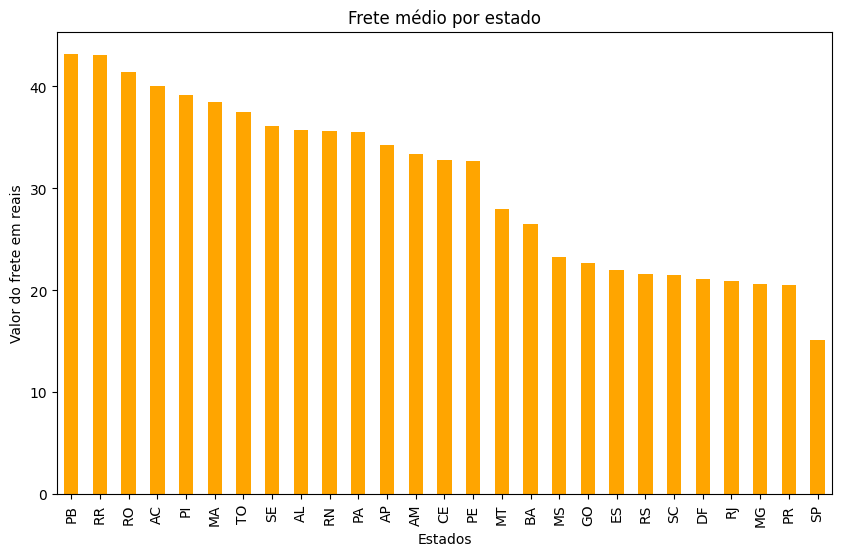

In [26]:
plt.figure(figsize=(10, 6))

frete_medio_por_estado_sorted.plot(kind='bar', color='orange')

# definir texto do título e eixos x e y

plt.title('Frete médio por estado')
plt.xlabel('Estados')
plt.ylabel('Valor do frete em reais')

plt.savefig('frete_por_estado.png')

Começaremos agora a responder à última pergunta: Qual a relação entre estado e status de entrega (atrasado, adiantado, entregue)?

A partir deste ponto tive muita dificuldade de encontrar maneiras para plotar as informações que queria

In [27]:
# para isso, começamos selecionando apenas os produtos cujo 'status_entrega' seja ATRASADO
# e então armazenamos estes valores numa variável

atrasado_index1 = df_olist['status_entrega'] == 'ATRASADO'

# criando um filtro dentro do df
df_filtrado1 = df_olist[atrasado_index1]

# agrupar e agregar
top_atrasados = df_filtrado1.groupby('customer_state').agg({'order_id': 'count'}).sort_values('order_id', ascending=False)

# para facilitar a visualização, iremos selecionar os 5 estados com maior quantidade de produtos vendidos
top_atrasados.head(5)

,order_id
customer_state,
SP,25188
RJ,11648
MG,10267
RS,5421
PR,4515


In [28]:
atrasado_index2 = df_olist['status_entrega'] == 'DENTRO DO ESPERADO'

# criando um filtro dentro do df
df_filtrado2 = df_olist[atrasado_index2]

# agrupar e agregar
top_dentrodoesperado = df_filtrado2.groupby('customer_state').agg({'order_id': 'count'}).sort_values('order_id', ascending=False)
top_dentrodoesperado.head(5)

,order_id
customer_state,
SP,6222
MG,1163
RJ,914
PR,420
RS,306


In [29]:
atrasado_index3 = df_olist['status_entrega'] == 'ADIANTADO'

# criando um filtro dentro do df
df_filtrado3 = df_olist[atrasado_index3]

# agrupar e agregar
top_adiantado = df_filtrado3.groupby('customer_state').agg({'order_id': 'count'}).sort_values('order_id', ascending=False)
top_adiantado.head(5)

,order_id
customer_state,
SP,15015
RJ,1489
MG,1475
PR,713
RS,435


Rodando essas funções acima, chegamos nos top 5 estados e os seus correspondentes pedidos marcados com os status 'Atrasado', 'Dentro do esperado' e 'Adiantado'

Então busquei colocar todas as informações em um mesmo dataframe pois pensei que isso poderia me auxiliar

In [30]:
df_status = pd.merge(top_atrasados, top_dentrodoesperado, on=['customer_state'], how='inner')
df_status

,order_id_x,order_id_y
customer_state,,
SP,25188,6222
RJ,11648,914
MG,10267,1163
RS,5421,306
PR,4515,420
SC,3545,226
BA,3498,72
GO,2084,63
ES,2002,95


In [31]:
df_status = pd.merge(df_status, top_adiantado, on=['customer_state'], how='inner')
df_status

,order_id_x,order_id_y,order_id
customer_state,,,
SP,25188,6222,15015
RJ,11648,914,1489
MG,10267,1163,1475
RS,5421,306,435
PR,4515,420,713
SC,3545,226,307
BA,3498,72,99
GO,2084,63,115
ES,2002,95,108


Abaixo temos um DF com as informações que queríamos, a saber:
status de entrega, separados pelos 5 estados com mais pedidos.
Nesse momento perdemos o label 'Atrasado', 'Dentro do esperado' e 'Adiantado',
pois não soube renomeá-las

In [32]:
df_status.head(5)

,order_id_x,order_id_y,order_id
customer_state,,,
SP,25188,6222,15015
RJ,11648,914,1489
MG,10267,1163,1475
RS,5421,306,435
PR,4515,420,713


In [33]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, SP to AM
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   order_id_x  24 non-null     int64
 1   order_id_y  24 non-null     int64
 2   order_id    24 non-null     int64
dtypes: int64(3)
memory usage: 768.0+ bytes


A partir daqui temos várias tentativas de plotagem de gráfico. Sei que está bagunçado, mas peço paciência

Primeira tentativa de plotagem de gráfico:

Não saiu bem como queria, pois não consegui plotar um gráfico visualmente interessante. O ideal seria consegui aplicar tonalidades para cada status.

order_id_x = atrasado

order_id_y = dentro do esperado

order_id = adiantado

<Figure size 1000x600 with 0 Axes>

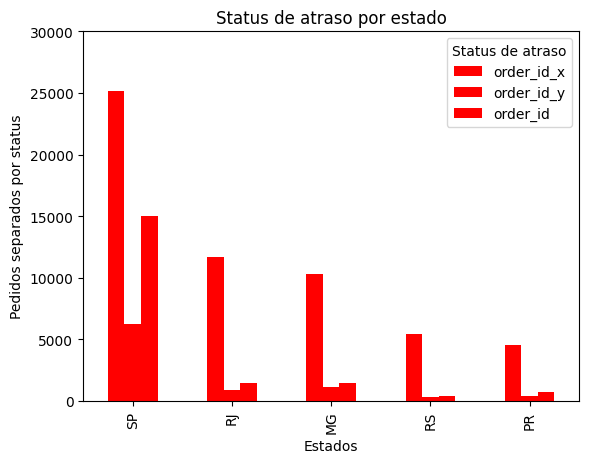

In [34]:
plt.figure(figsize=(10, 6))

df_status.head(5).plot(kind='bar', color='red')

plt.title('Status de atraso por estado')
plt.xlabel('Estados')
plt.ylabel('Pedidos separados por status')

plt.ylim(0,30000)

plt.legend(title = 'Status de atraso')

plt.show()

In [35]:
# tentei rodar um value_counts pra entender a proporção mas não consigo calcular a percentagem de order_id
# ao invés disso ele me retorna a porcentagem equivalente a 1/27 (27 estados na federação)
# (deixei aqui para tirar a dúvida depois)

top_atrasados.value_counts(normalize=True)

order_id
46          0.037037
1016        0.037037
11648       0.037037
10267       0.037037
5421        0.037037
4515        0.037037
3545        0.037037
3498        0.037037
2084        0.037037
2002        0.037037
1992        0.037037
1644        0.037037
1374        0.037037
995         0.037037
79          0.037037
765         0.037037
743         0.037037
561         0.037037
502         0.037037
476         0.037037
419         0.037037
362         0.037037
295         0.037037
269         0.037037
159         0.037037
91          0.037037
25188       0.037037
Name: proportion, dtype: float64

In [36]:
# por isso comecei a calcular a porcentagem "na unha"

porcentagem_atrasado = top_atrasados['order_id'].div(top_atrasados['order_id'].sum()) * 100

porcentagem_atrasado = porcentagem_atrasado.head(5)

porcentagem_atrasado

customer_state
SP    31.502326
RJ    14.568012
MG    12.840812
RS     6.779979
PR     5.646856
Name: order_id, dtype: float64

In [37]:
porcentagem_dentrodoesperado = top_dentrodoesperado['order_id'].div(top_dentrodoesperado['order_id'].sum()) * 100

porcentagem_dentrodoesperado = porcentagem_dentrodoesperado.head(5)

porcentagem_dentrodoesperado

customer_state
SP    63.341138
MG    11.839560
RJ     9.304693
PR     4.275680
RS     3.115138
Name: order_id, dtype: float64

In [38]:
porcentagem_adiantado = top_adiantado['order_id'].div(top_adiantado['order_id'].sum()) * 100

porcentagem_adiantado = porcentagem_adiantado.head(5)

porcentagem_adiantado

customer_state
SP    74.236132
RJ     7.361812
MG     7.292594
PR     3.525166
RS     2.150697
Name: order_id, dtype: float64

Temos, então, as porcentagens relativas ao status de entrega, separados pelos top 5 estados com mais pedidos

Juntei esses valores num mesmo DF na tentativa de plotar algo interessante

In [39]:
df_porcentagem = pd.merge(porcentagem_atrasado, porcentagem_dentrodoesperado, on=['customer_state'], how='inner')

In [40]:
df_porcentagem = pd.merge(df_porcentagem, porcentagem_adiantado, on=['customer_state'], how='inner')
df_porcentagem

,order_id_x,order_id_y,order_id
customer_state,,,
SP,31.502326,63.341138,74.236132
RJ,14.568012,9.304693,7.361812
MG,12.840812,11.839560,7.292594
RS,6.779979,3.115138,2.150697
PR,5.646856,4.275680,3.525166


Plotei um gráfico de acordo com a porcentagem

<Figure size 1000x600 with 0 Axes>

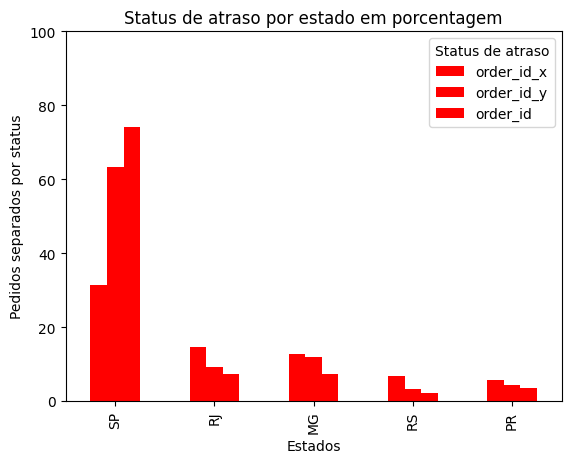

In [41]:
plt.figure(figsize=(10, 6))

df_porcentagem.plot(kind='bar', color='red')

plt.title('Status de atraso por estado em porcentagem')
plt.xlabel('Estados')
plt.ylabel('Pedidos separados por status')

plt.ylim(0,100)

plt.legend(title = 'Status de atraso')

plt.show()

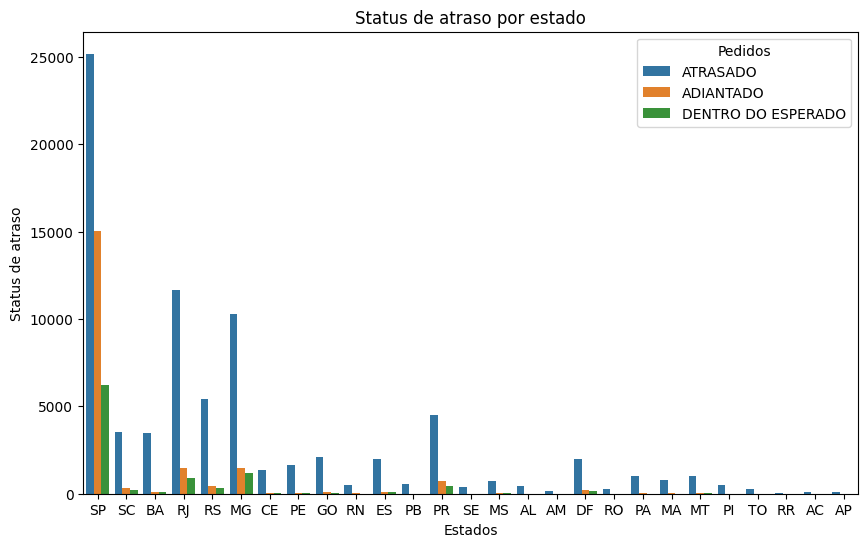

In [42]:
# gráfico que funciona pois uso a DF original mas sem conseguir samplear os top 5
# tampouco trabalhando com porcentagem

# definir tamanho da figura
plt.figure(figsize=(10, 6))

sns.countplot(data = df_olist,
              x = 'customer_state',
              hue = 'status_entrega')

# definir texto do título e eixos x e y

plt.title('Status de atraso por estado')
plt.xlabel('Estados')
plt.ylabel('Status de atraso')

plt.legend(title = 'Pedidos')

plt.show()

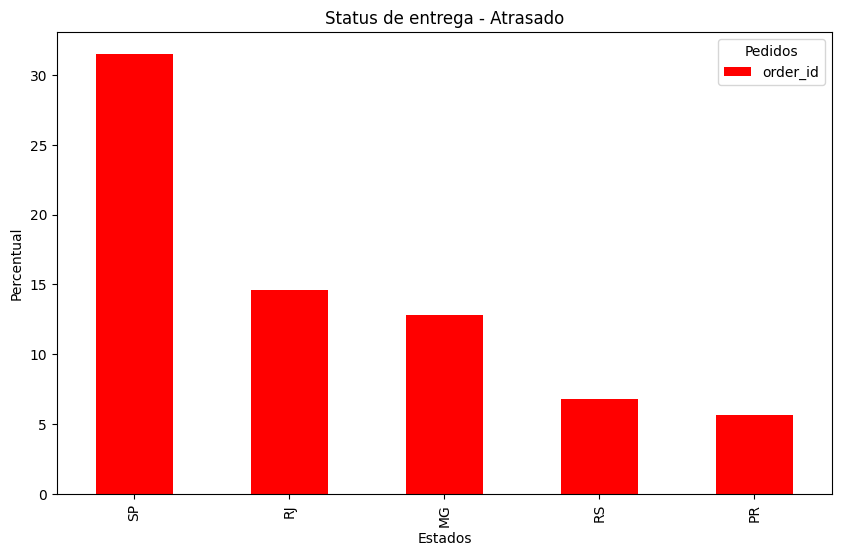

In [43]:
# plotando gráficos de status de entrega separadamente

# definir tamanho da figura
plt.figure(figsize=(10, 6))

porcentagem_atrasado.plot(kind='bar', color='red')

# definir texto do título e eixos x e y

plt.title('Status de entrega - Atrasado')
plt.xlabel('Estados')
plt.ylabel('Percentual')

plt.legend(title = 'Pedidos')

plt.show()

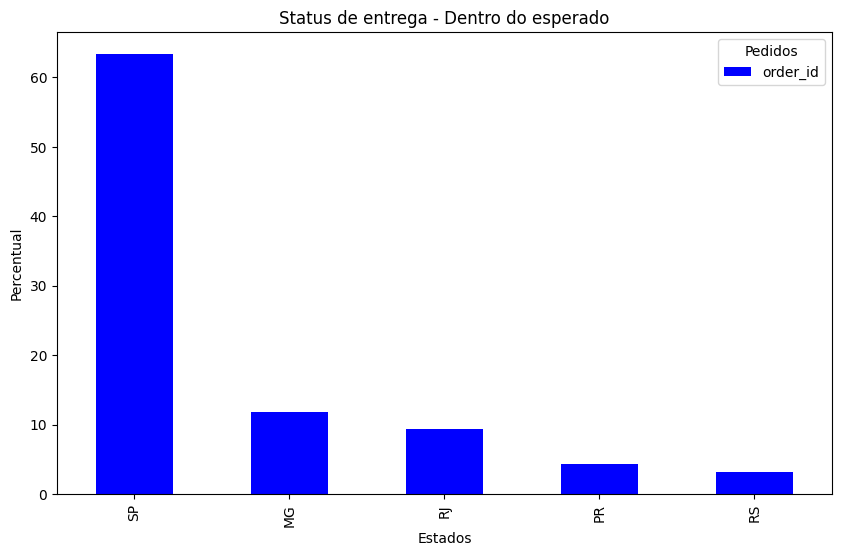

In [44]:
# plotando gráficos de status de entrega separadamente

# definir tamanho da figura
plt.figure(figsize=(10, 6))

porcentagem_dentrodoesperado.plot(kind='bar', color='blue')

# definir texto do título e eixos x e y

plt.title('Status de entrega - Dentro do esperado')
plt.xlabel('Estados')
plt.ylabel('Percentual')

plt.legend(title = 'Pedidos')

plt.show()

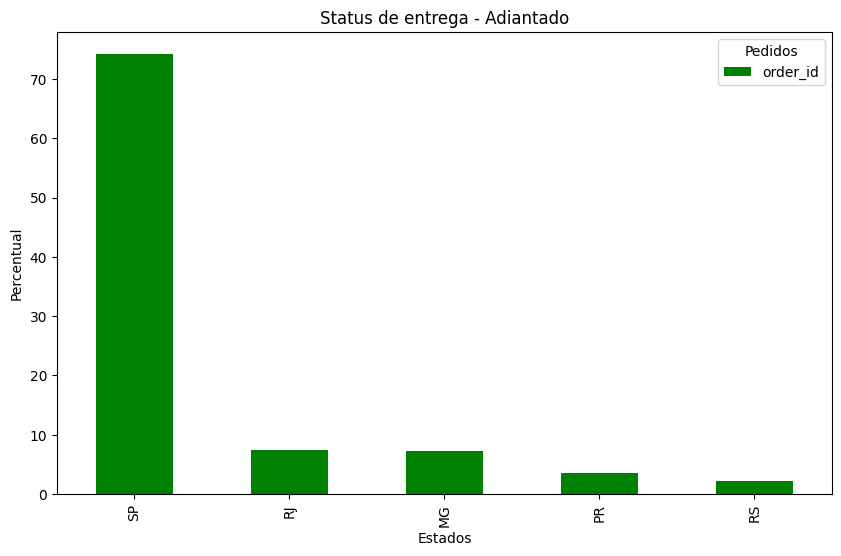

In [45]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

porcentagem_adiantado.plot(kind='bar', color='green')

# definir texto do título e eixos x e y

plt.title('Status de entrega - Adiantado')
plt.xlabel('Estados')
plt.ylabel('Percentual')

plt.legend(title = 'Pedidos')

plt.show()

Não estou satisfeita com os gráficos que relacionam status de entrega X estado, mas foram um exercício interessante de mexer com essas ferramentas e tentar aprender.

Calculei a porcentagem de reviews por status de entrega, mas não consegui plotar um gráfico com essas infos

In [46]:
porcentagem_review_1 = df_filtrado1['review_score'].value_counts(normalize=True)
porcentagem_review_2 = df_filtrado2['review_score'].value_counts(normalize=True)
porcentagem_review_3 = df_filtrado3['review_score'].value_counts(normalize=True)